### Object Detection with Tensorflow

In this example, we will use Tensorflow models and neural net to make object detection within OpenCV API.

**Tensorflow**: TensorFlow™ is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains. 

https://www.tensorflow.org/

In [1]:
#You can use following command to install missing packages
!pip install --upgrade pip
!pip install opencv-python

Requirement already up-to-date: pip in /usr/local/lib/python2.7/dist-packages (10.0.1)


In [2]:
# lets first import numpy, cv and tensorflow libraries
import numpy as np
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as  plt

Just like Caffe, Tensorflow has its own Model Zoo at:

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md

These models are previously developed with set of images and ready to use for object detection.

We will use the http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz

ssd_mobilenet_v1_coco, which means model developed using imageset from http://mscoco.net 

Download tar.gz file and extract it. Copy the **frozen_inference_graph.pb** file to a location you like to use.

Then, download the network file pbtxt, which are ready to download from: https://gist.githubusercontent.com/dkurt/45118a9c57c38677b65d6953ae62924a/raw/b0edd9e8c992c25fe1c804e77b06d20a89064871/ssd_mobilenet_v1_coco_2017_11_17.pbtxt

```shell
wget -O /home/upsquared/workshop/lab-opencv-examples/OpenCV_Object_Detection/models/ssd_mobilenet_v1_coco_2017_11_17.tar.gz http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz

cd /home/upsquared/workshop/lab-opencv-examples/OpenCV_Object_Detection/models/

tar xzvf ssd_mobilenet_v1_coco_2017_11_17.tar.gz

mv ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb .

wget -O /home/upsquared/workshop/lab-opencv-examples/OpenCV_Object_Detection/models/ssd_mobilenet_v1_coco_2017_11_17.pbtxt https://gist.githubusercontent.com/dkurt/45118a9c57c38677b65d6953ae62924a/raw/b0edd9e8c992c25fe1c804e77b06d20a89064871/ssd_mobilenet_v1_coco_2017_11_17.pbtxt
```

In [3]:
# here is the models 
tf_model_file = 'models/frozen_inference_graph.pb'
tf_config_file = 'models/ssd_mobilenet_v1_coco_2017_11_17.pbtxt'

In [4]:
# coco labels
# there are 183 labels, all can be find in models/mscoco_labels.txt, below code parses labels to reuse them
tf_labels_file = 'models/mscoco_labels.txt'

labels = list()

with open(tf_labels_file) as f:
    lines = f.readlines()
    for line in lines:
        items = line.split(': ')
        labels.append(items[1].replace('\n', ''))

print('Number of Labels: '+ str(len(labels)))
        
label_colors = np.random.uniform(0, 255, (len(labels),3))

Number of Labels: 183


OpenCV has been enabled to work with Deep Neural Network frameworks including Caffe to load models and neural network instead of haar cascade files for object detection.

OpenCV dnn API provides readNetFromCaffe method to load pre-trained Caffe models.

In [5]:
tf_net = cv.dnn.readNetFromTensorflow(tf_model_file, tf_config_file)

Now, we will make OpenCV DNN to get image to generate a blob after mean subtraction, normalizing, and channel swapping.

**blob**: (A Binary Large OBject) 4-dimensional blob from series of images.

Which is eventually required input for neural network for detecting objects

In [6]:
# Let's define and open an existing image from our resources
source_image = '../images/street/YellowWhite.jpg'
img = cv.imread(source_image)

In [7]:
# Now, we open the image we want to run object detection of MobileNetSSD model.

#blobFromImage: 
# Creates 4-dimensional blob from series of images. Optionally resizes and crops images from center, 
# subtract mean values, scales values by scalefactor, swap Blue and Red channels.

# Neural net uses image to generate detected object list with given parameters, these parameters can be found from:
#  https://github.com/opencv/opencv/tree/master/samples/dnn 

# First we get image size
rows = img.shape[0]
cols = img.shape[1]

blob = cv.dnn.blobFromImage(img, 1.0/127.5, (300, 300), (127.5, 127.5, 127.5), swapRB=True, crop=False)

# send blob input to neural net 
tf_net.setInput(blob)

Detected: 
Object - Confidence
car - 0.8983
car - 0.6878
car - 0.6028


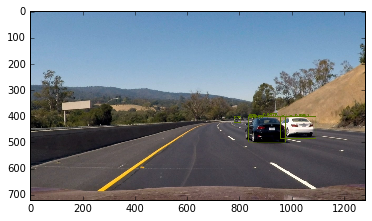

In [8]:
# forward method is asking all detected objects
out = tf_net.forward()

# confidence is used as thresheold for confidence for the detected object.
# this means how the object fitted to detected object
confidence = 0.6

print('Detected: ')
print('Object - Confidence')
## here we get the data for each detected object in the blob
for detection in out[0,0,:,:]:
    score = float(detection[2])
    
    label_idx = int(detection[1])
    
    label_text = str(labels[label_idx]) + " - " + str(round(score, 4))
    
    if score > confidence:
        print(label_text)
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        cv.putText(img, label_text, (int(left), int(top)), cv.FONT_HERSHEY_SIMPLEX, 0.5, label_colors[label_idx], 2)
        cv.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), label_colors[label_idx], thickness=2)
        
# show image on a window
#cv.imshow('img', img)
#print image on notebook, Cars has been detected
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
#cv.waitKey()

## Resources

- https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
- https://github.com/opencv/opencv/blob/master/samples/dnn/object_detection.py
- https://github.com/tensorflow/models
